# Decision Tree Classifier - UEFA Europa League
----------------
Este codigo realiza una clasificacion de arbol de decision para un set de datos que incluye informacion sobre estadios de la UEFA con 3 variables de decision y una variable objetivo para definir las probabilidades de ser sede de la final de la UEFA Europa League.

## Importar Librerias

In [44]:
from sklearn.cross_validation import train_test_split 
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from lightgbm import create_tree_digraph
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

## Leer archivo CSV y crear dataframe

In [45]:
stadiums_csv = "UEFA_Stadiums_Geo_Data_UTF8.csv"
stadiums_df = pd.read_csv(stadiums_csv)
stadiums_df.dtypes

Unnamed: 0              int64
Confederation          object
Stadium                object
City                   object
HomeTeams              object
Capacity                int64
Country                object
IOC                    object
Population              int64
UCLChampions             bool
UELChampion              bool
UCLFinalStadium          bool
UELFinalStadium          bool
Capacidad/1000Habs    float64
Latitude              float64
Longitude             float64
dtype: object

## Remover columnas que no se usaran en el modelo

In [46]:
stadiums_df = stadiums_df.drop(['Unnamed: 0','Confederation','City','HomeTeams','IOC','Capacidad/1000Habs','Latitude', 'Longitude'], axis=1)

stadiums_df.head()

,Stadium,Capacity,Country,Population,UCLChampions,UELChampion,UCLFinalStadium,UELFinalStadium
0,Stadiumi Besëlidhja,7000,Albania,2876591,False,False,False,False
1,Stadiumi Flamurtari,8200,Albania,2876591,False,False,False,False
2,Stadiumi Laçi,5000,Albania,2876591,False,False,False,False
3,Stadiumi Niko Dovana,12040,Albania,2876591,False,False,False,False
4,Stadiumi Selman Stërmasi,9500,Albania,2876591,False,False,False,False


## Asignar los valores de las variables de decision y la variable objetivo

In [47]:
X = stadiums_df.values[:, [1,3,5]]
Y = stadiums_df.values[:, 7]
Y=Y.astype('int')


## Dividir el data set en Training y Test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 

## Generar el arbol de decision en base a los datos proporcionados

In [49]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

## Visualizacion del arbol de decision

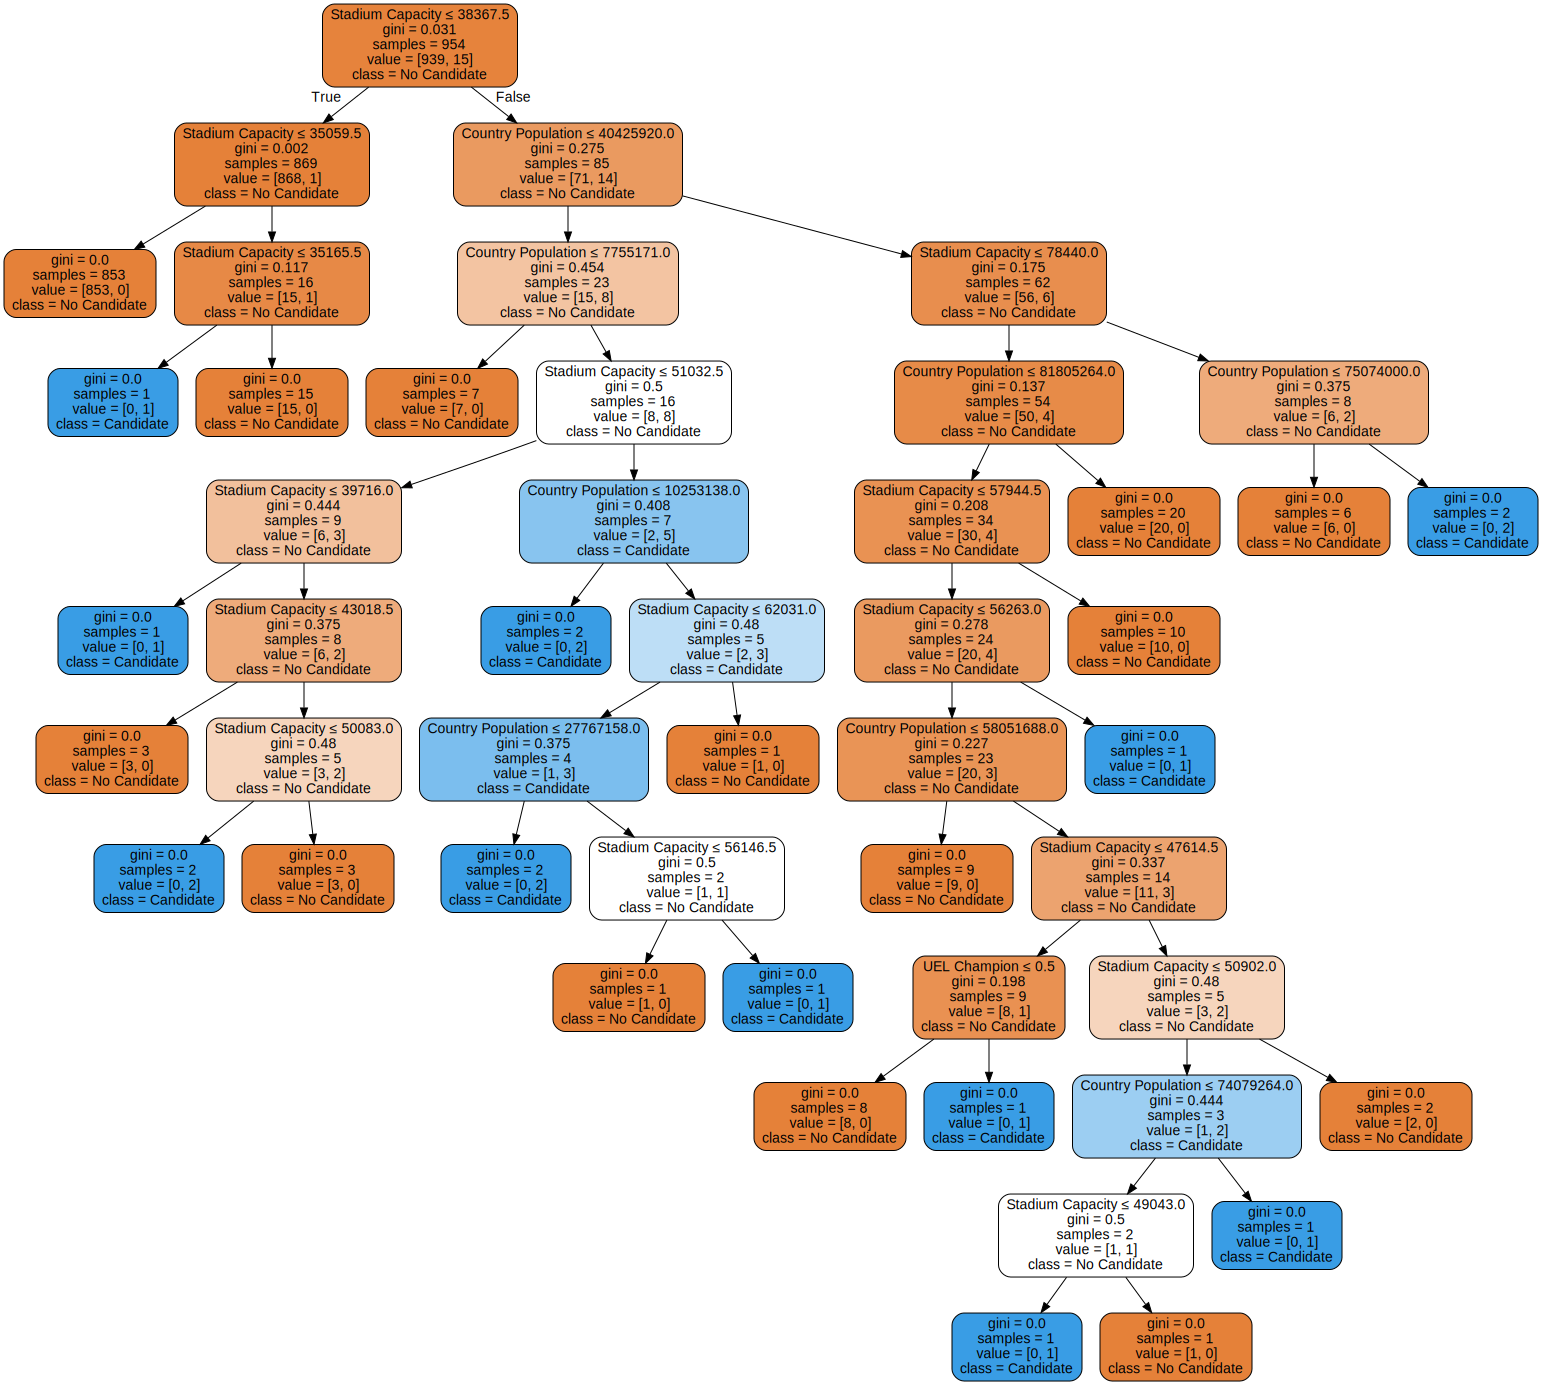

In [50]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=['Stadium Capacity','Country Population', 'UEL Champion'],  
    class_names=['No Candidate','Candidate'],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('UELDecisionTree.png')

graph = graphviz.Source(dot_data)  
graph 